In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/ds_AbhimanyuKotari


csv_files  ds_report.pdf  notebook_1.ipynb  notebook_2.ipynb  README.md


In [5]:
!ls /content/drive/MyDrive/ds_AbhimanyuKotari/csv_files


fear_greed_index.csv  historical_data.csv


✅ Step 4 — Load and inspect your datasets

In [6]:
import pandas as pd

# Load the datasets from Google Drive
fear_greed = pd.read_csv('/content/drive/MyDrive/ds_AbhimanyuKotari/csv_files/fear_greed_index.csv')
historical = pd.read_csv('/content/drive/MyDrive/ds_AbhimanyuKotari/csv_files/historical_data.csv')

# Display basic info
print("Fear & Greed shape:", fear_greed.shape)
print("Historical data shape:", historical.shape)

# Show first few rows
print("\nFear & Greed sample:")
display(fear_greed.head())

print("\nHistorical data sample:")
display(historical.head())


Fear & Greed shape: (2644, 4)
Historical data shape: (211224, 16)

Fear & Greed sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Historical data sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


🧩 Step 5 — Clean and Prepare the Data

We’ll:

Rename columns to standard Python-friendly names

Convert timestamps to real date objects

Merge both datasets on the date field so we can analyze how trader performance relates to market sentiment

In [8]:
import pandas as pd

# --- Clean Fear & Greed dataset ---
fg = fear_greed.copy()

# Convert date column to proper datetime
fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date

# Rename columns to more Python-friendly names
fg = fg.rename(columns={
    'value': 'fear_greed_value',
    'classification': 'fear_greed_class'
})

# Keep only relevant columns
fg = fg[['date', 'fear_greed_value', 'fear_greed_class']]


# --- Clean Historical Trader dataset ---
hist = historical.copy()

# Convert Timestamp IST to proper datetime
hist['date'] = pd.to_datetime(hist['Timestamp IST'], errors='coerce').dt.date

# Rename key columns
hist = hist.rename(columns={
    'Account': 'account',
    'Coin': 'coin',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Closed PnL': 'closed_pnl',
    'Fee': 'fee'
})

# Keep only useful columns
hist = hist[['account', 'coin', 'execution_price', 'size_tokens', 'size_usd',
             'side', 'closed_pnl', 'fee', 'date']]


# --- Align date formats for merge ---
fg['date'] = pd.to_datetime(fg['date']).dt.date
hist['date'] = pd.to_datetime(hist['date']).dt.date


# --- Merge datasets on date ---
merged = pd.merge(hist, fg, on='date', how='left')

# --- Display sanity checks ---
print("Cleaned historical shape:", hist.shape)
print("Merged dataset shape:", merged.shape)
print("Columns:", merged.columns.tolist())

# --- Show first few rows ---
merged.head()


Cleaned historical shape: (211224, 9)
Merged dataset shape: (211224, 11)
Columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'closed_pnl', 'fee', 'date', 'fear_greed_value', 'fear_greed_class']


,account,coin,execution_price,size_tokens,size_usd,side,closed_pnl,fee,date,fear_greed_value,fear_greed_class
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,0.345404,2024-02-12,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,0.005600,2024-02-12,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,0.050431,2024-02-12,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,0.050043,2024-02-12,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,0.003055,2024-02-12,70.0,Greed


from matplotlib import pyplot as plt
_df_0['execution_price'].plot(kind='hist', bins=20, title='execution_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['size_tokens'].plot(kind='hist', bins=20, title='size_tokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['size_usd'].plot(kind='hist', bins=20, title='size_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['fee'].plot(kind='hist', bins=20, title='fee')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='execution_price', y='size_tokens', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='size_tokens', y='size_usd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='size_usd', y='fee', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['execution_price']
  ys = series['size_tokens']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('size_tokens')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['execution_price']
  ys = series['size_usd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('size_usd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['execution_price']
  ys = series['fee']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('fee')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['execution_price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'execution_price'}, axis=1)
              .sort_values('execution_price', ascending=True))
  xs = counted['execution_price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('execution_price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('execution_price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['execution_price'].plot(kind='line', figsize=(8, 4), title='execution_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['size_tokens'].plot(kind='line', figsize=(8, 4), title='size_tokens')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['size_usd'].plot(kind='line', figsize=(8, 4), title='size_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['fee'].plot(kind='line', figsize=(8, 4), title='fee')
plt.gca().spines[['top', 'right']].set_visible(False)

🧩 Step 6 — Exploratory Data Analysis (EDA Part 1)

Unique sentiment classes: ['Greed' 'Extreme Greed' 'Fear' nan 'Extreme Fear' 'Neutral']

Average Closed PnL per Sentiment Class:

fear_greed_class
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: closed_pnl, dtype: float64


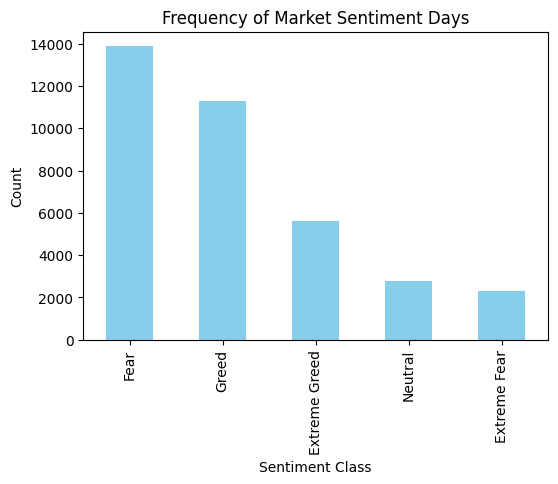

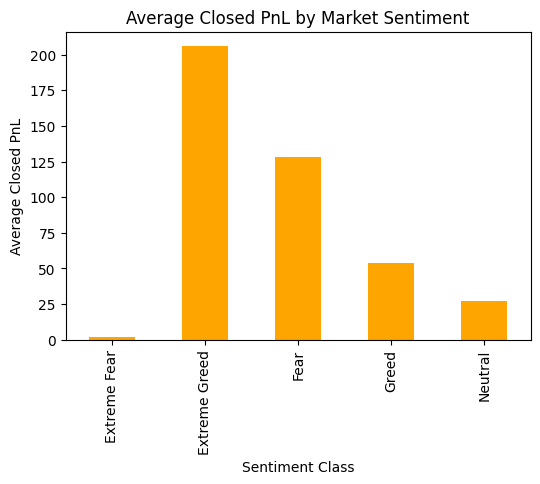

In [9]:
import matplotlib.pyplot as plt

# --- Basic Summary ---
print("Unique sentiment classes:", merged['fear_greed_class'].unique())
print("\nAverage Closed PnL per Sentiment Class:\n")
print(merged.groupby('fear_greed_class')['closed_pnl'].mean())

# --- Visualization 1: Sentiment Frequency ---
plt.figure(figsize=(6,4))
merged['fear_greed_class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Market Sentiment Days')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

# --- Visualization 2: Average Trader Performance by Sentiment ---
plt.figure(figsize=(6,4))
merged.groupby('fear_greed_class')['closed_pnl'].mean().plot(kind='bar', color='orange')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Class')
plt.ylabel('Average Closed PnL')
plt.show()


✅ Step 7 — EDA Part 2: Trader Behavior Insights

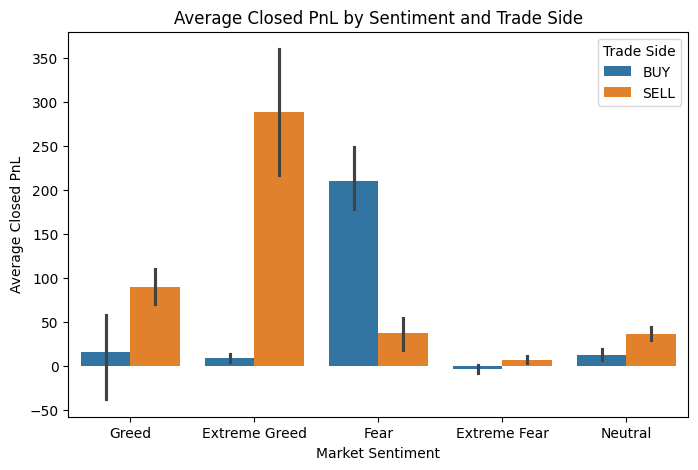

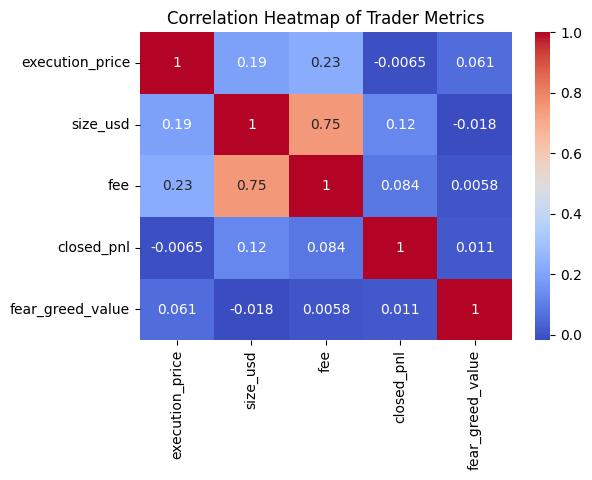


Volatility (PnL Std Dev) by Sentiment:
 fear_greed_class
Extreme Greed    1861.557119
Greed            1399.468182
Fear             1342.348497
Neutral           142.945889
Extreme Fear       76.727713
Name: closed_pnl, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Trader performance by side (BUY vs SELL) across sentiment ---
plt.figure(figsize=(8,5))
sns.barplot(data=merged, x='fear_greed_class', y='closed_pnl', hue='side', estimator='mean')
plt.title('Average Closed PnL by Sentiment and Trade Side')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.legend(title='Trade Side')
plt.show()

# --- Correlation heatmap (numerical relationships) ---
plt.figure(figsize=(6,4))
sns.heatmap(merged[['execution_price','size_usd','fee','closed_pnl','fear_greed_value']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Trader Metrics')
plt.show()

# --- Volatility measure (PnL variance by sentiment) ---
volatility = merged.groupby('fear_greed_class')['closed_pnl'].std().sort_values(ascending=False)
print("\nVolatility (PnL Std Dev) by Sentiment:\n", volatility)


✅ Step 8 — Save Processed Data & Charts

In [12]:
import os
import matplotlib.pyplot as plt

# --- Define save paths ---
base_path = "/content/drive/MyDrive/ds_AbhimanyuKotari"
csv_path = f"{base_path}/csv_files/merged_trader_sentiment.csv"
output_path = f"{base_path}/outputs/"

# --- Create outputs folder if it doesn't exist ---
os.makedirs(output_path, exist_ok=True)

# --- Save merged dataset ---
merged.to_csv(csv_path, index=False)
print(f"Merged dataset saved to: {csv_path}")

# --- Save plots to outputs folder ---

# 1. Sentiment frequency plot
plt.figure(figsize=(6,4))
merged['fear_greed_class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Market Sentiment Days')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(output_path + "sentiment_frequency.png")
plt.close()

# 2. Average PnL by Sentiment
plt.figure(figsize=(6,4))
merged.groupby('fear_greed_class')['closed_pnl'].mean().plot(kind='bar', color='orange')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Class')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.savefig(output_path + "avg_pnl_by_sentiment.png")
plt.close()

print(f"Charts saved to: {output_path}")


Merged dataset saved to: /content/drive/MyDrive/ds_AbhimanyuKotari/csv_files/merged_trader_sentiment.csv
Charts saved to: /content/drive/MyDrive/ds_AbhimanyuKotari/outputs/


In [22]:
import os
from pathlib import Path
base = Path("/content/drive/MyDrive/ds_AbhimanyuKotari")

# Files/folders to include (adjust if you stored different names)
to_zip = [
    "notebook_1.ipynb",
    "ds_report.pdf",
    "README.md",
    "csv_files/merged_trader_sentiment.csv",
    "outputs"
]

# Create a temporary cleaned folder to zip only necessary files (optional but tidy)
tmp = base / "submission_temp"
if tmp.exists():
    import shutil
    shutil.rmtree(tmp)
tmp.mkdir()

# Copy items selectively
import shutil
for item in to_zip:
    src = base / item
    dest = tmp / Path(item).name
    if src.exists():
        if src.is_dir():
            shutil.copytree(src, tmp / src.name)
        else:
            shutil.copy2(src, tmp / src.name)
    else:
        print("Warning: missing", src)

# Create zip
zip_path = base / "ds_AbhimanyuKotari_submission.zip"
if zip_path.exists():
    zip_path.unlink()
shutil.make_archive(str(zip_path.with_suffix('')), 'zip', str(tmp))

# Clean up temp folder
shutil.rmtree(tmp)

print("ZIP created at:", zip_path)
print("Size (MB):", round(zip_path.stat().st_size / (1024*1024), 2))


ZIP created at: /content/drive/MyDrive/ds_AbhimanyuKotari/ds_AbhimanyuKotari_submission.zip
Size (MB): 3.08
